In [108]:
import pickle
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
file = open('../../scraping/iihs_crashratings/iihsratings2017', 'rb')
iihs_rating = pickle.load(file)

In [110]:
file = open('../../scraping/iihs_death/iihsdeath2017', 'rb')
iihs_deaths = pickle.load(file)

In [111]:
iihs_join_raw = iihs_deaths.join(iihs_rating, lsuffix='_l', rsuffix='_r')
iihs_join = iihs_join_raw[['death_rate','small_overlap_driver','curb_weight']]

In [112]:
# rid of one model outlier
iihs_join.loc[3,'death_rate'] = None

In [113]:
iihs_join = iihs_join.dropna()
iihs_join['curb_weight'] = iihs_join['curb_weight'].apply(lambda x: x.replace(',',''))

In [114]:

iihs_join = iihs_join.astype({'death_rate':'int64', 'curb_weight':'int64'})
iihs_join.dtypes

death_rate               int64
small_overlap_driver    object
curb_weight              int64
dtype: object

In [115]:
iihs_join['curb_weight^2'] = iihs_join['curb_weight']**2

In [116]:
dummy_iihs = pd.get_dummies(iihs_join)

In [117]:
X = pd.get_dummies(iihs_join[['curb_weight^2','curb_weight','small_overlap_driver']])
y = iihs_join['death_rate']



In [118]:
p = PolynomialFeatures()
X_poly = p.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.25)

In [119]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.31885158627981514

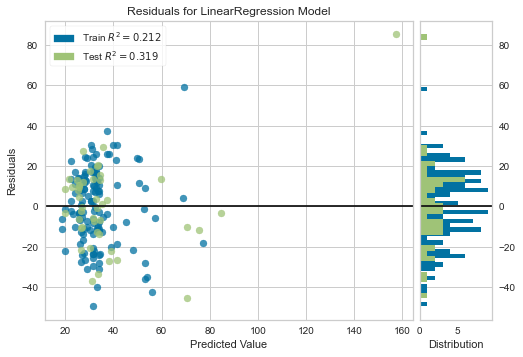

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [120]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [121]:
(y - model.predict(X_poly)).sort_values(ascending=False).tail(10)

6     -26.249536
165   -27.278957
80    -28.306193
59    -29.511368
58    -30.510824
50    -30.557416
88    -30.678114
4     -37.249536
48    -59.212823
0     -85.254393
Name: death_rate, dtype: float64

In [122]:
coef_list = list(zip(p.get_feature_names(X.columns), visualizer.coef_))
coef_list

[('1', 0.0011885472729534566),
 ('curb_weight^2', 0.00026539475307298636),
 ('curb_weight', -1.3667015673291973),
 ('small_overlap_driver_A', -0.004136747562214066),
 ('small_overlap_driver_G', -0.001990799357920256),
 ('small_overlap_driver_M', 0.0025654415833129282),
 ('small_overlap_driver_P', 0.003562105273181382),
 ('curb_weight^2^2', 4.9656307407373266e-12),
 ('curb_weight^2 curb_weight', -8.913618202621395e-08),
 ('curb_weight^2 small_overlap_driver_A', 6.511395670066003e-05),
 ('curb_weight^2 small_overlap_driver_G', 6.293680852782925e-05),
 ('curb_weight^2 small_overlap_driver_M', 6.494871931062711e-05),
 ('curb_weight^2 small_overlap_driver_P', 6.644342028004587e-05),
 ('curb_weight^2', 0.00025944288681672994),
 ('curb_weight small_overlap_driver_A', -0.34237046911712965),
 ('curb_weight small_overlap_driver_G', -0.3350248180809255),
 ('curb_weight small_overlap_driver_M', -0.34138665074475805),
 ('curb_weight small_overlap_driver_P', -0.347919629966446),
 ('small_overlap_dri